In [1]:
# installing the kaggle library
!pip install kaggle

In [2]:
#configuring the pah of kaggle.Json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install -q --upgrade kaggle

Importing dog vs cat dataset from kaggle

In [4]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats --force

 99% 803M/812M [00:07<00:00, 276MB/s]
100% 812M/812M [00:07<00:00, 114MB/s]


In [5]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [6]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('Number of images',file_count)

Number of images 25000


Printing the names of images

In [8]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.11460.jpg', 'dog.11750.jpg', 'cat.9352.jpg', 'cat.11988.jpg', 'cat.6216.jpg', 'cat.8693.jpg', 'cat.456.jpg', 'cat.4512.jpg', 'cat.339.jpg', 'dog.5662.jpg', 'dog.3280.jpg', 'cat.4055.jpg', 'cat.1381.jpg', 'cat.4268.jpg', 'cat.10580.jpg', 'cat.1968.jpg', 'dog.7756.jpg', 'cat.2892.jpg', 'cat.7254.jpg', 'cat.11338.jpg', 'dog.12178.jpg', 'cat.952.jpg', 'dog.6666.jpg', 'cat.454.jpg', 'dog.93.jpg', 'cat.2292.jpg', 'dog.12471.jpg', 'cat.4876.jpg', 'cat.6398.jpg', 'cat.6251.jpg', 'cat.4941.jpg', 'cat.10788.jpg', 'dog.3241.jpg', 'dog.10442.jpg', 'cat.12439.jpg', 'dog.4250.jpg', 'cat.4857.jpg', 'cat.2133.jpg', 'cat.7551.jpg', 'cat.3492.jpg', 'cat.5532.jpg', 'dog.1383.jpg', 'cat.6876.jpg', 'dog.3782.jpg', 'cat.6414.jpg', 'cat.1358.jpg', 'cat.8473.jpg', 'dog.11035.jpg', 'dog.4754.jpg', 'cat.6028.jpg', 'cat.10875.jpg', 'dog.6778.jpg', 'cat.5505.jpg', 'dog.6872.jpg', 'cat.11444.jpg', 'dog.9397.jpg', 'cat.4188.jpg', 'dog.10197.jpg', 'dog.9990.jpg', 'cat.8100.jpg', 'cat.9434.jpg', 'dog.2152.jpg',

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

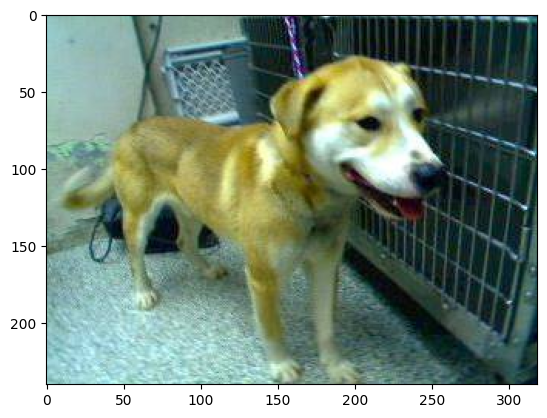

In [10]:
#display dog image
img=mpimg.imread('/content/train/dog.11098.jpg')
imgplot=plt.imshow(img)
plt.show()

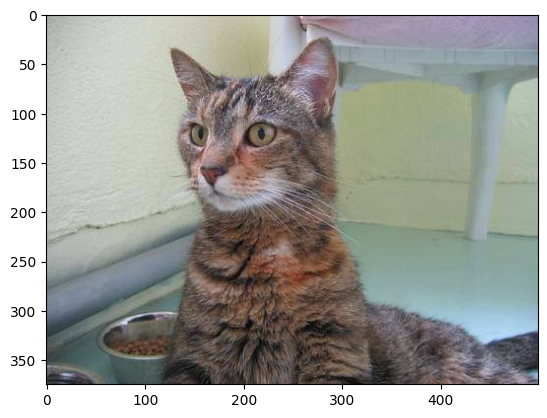

In [11]:
#display the cat image
img=mpimg.imread('/content/train/cat.11876.jpg')
imgplot=plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train')

dog_count=0
cat_count=0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =',dog_count)
print('Number of cat images =',cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [13]:
#creating a directory for resied imges
os.makedirs('/content/image resized',exist_ok=True)

In [14]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img =Image.open(img_path)
  img = img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)

In [15]:
#display resized dog image
img = mpimg.imread('/content/image resized/dog.10540.jpg')
imgplt = plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/image resized/dog.10540.jpg'

In [ ]:
#display the resized cat image
img=mpimg.imread('/content/image resized/cat.10030.jpg')
imgplot=plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat ---> 0                              
Dog ---> 1

In [ ]:
#creating a forloop to assign labels
filenames=os.listdir('/content/image resized')
labels=[]
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [ ]:
print(filenames[0:5])
print(len(filenames))

In [ ]:
print(labels[0:5])
print(len(labels))

In [ ]:
#counting the images of dogs and cats out of 2000 images
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

Converting all the resized images to numpy arrays


In [ ]:
import cv2
import glob


In [ ]:
image_directory = '/content/image resized/'
image_extension= ['png','jpg']

files=[]
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]
dog_cat_images =np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images.shape)
type(dog_cat_images)


In [ ]:
x=dog_cat_images
y=np.asarray(labels)

**Train Test Split**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

1600 ---> training images               
400 ---> test images

In [ ]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
print(x_train_scaled)

**Building the neural network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)


In [ ]:

num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam'
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(x_train_scaled,y_train,epochs=5)

In [ ]:
score,acc=model.evaluate(x_test_scaled,y_test)
print('test loss',score)
print('test accuracy',acc)

**Predictive system**

In [ ]:
input_image_path = input('path of the image to be predicted:')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

print(input_prediction)

if input_prediction == 0:
  print('The image is of a cat')
else:
  print('The image is of a dog')